<a href="https://colab.research.google.com/github/apoorvrocks/Machine-Learning-Assignment-1/blob/main/Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   200 classes for training.
2.   Each class has 500 images.
3.   The test set contains 10,000 images.
4.   All images are 64x64x3 colored ones.






In [1]:
from zipfile import ZipFile
import os
import random
import numpy as np
from skimage import color
from skimage import io
import matplotlib.pyplot as plt
import gc

UNZIP DATA

In [2]:
with ZipFile('/content/drive/MyDrive/IISc/PRNN/tiny-imagenet-200.zip', 'r') as zipObj:
   zipObj.extractall()

SET PATHS

In [3]:
test_path = '/content/tiny-imagenet-200/test'
train_path = '/content/tiny-imagenet-200/train'
validation_path = '/content/tiny-imagenet-200/val'

In [4]:
x = []
NO_CLASSES = 200
NO_IMAGES = 250
class_folders = os.listdir(train_path)

# loop over classes
for class_folder in class_folders[:NO_CLASSES]: 

  image_folder_path = train_path + os.path.sep + class_folder + os.path.sep + 'images' + os.path.sep
  image_file_names = os.listdir(image_folder_path)

  # loop over images
  for image_file_name in image_file_names[:NO_IMAGES]: # loop over all images in a class
    img = io.imread(image_folder_path + image_file_name)
    imgGray = color.rgb2gray(img) # read as grayscale image to reduce dimensions
    flat_image = imgGray.flatten() 
    
    x.append(flat_image)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  from ipykernel import kernelapp as app


In [5]:
def normalize_matrix(mat):
  for c in range(len(mat[0])):
    col = mat[:,c]
    mn = min(col)
    mx = max(col)
    mat[:,c] = (col - mn)/(mx - mn)

  return mat

In [6]:
X = normalize_matrix(np.array(x))
del x
gc.collect()
print(X.shape)

(50000, 4096)


fit sklearn GMM

In [7]:
from sklearn.mixture import GaussianMixture
pred_GMM_estimate = GaussianMixture(n_components = 10, max_iter= 100)
pred_GMM_estimate.fit(X)
mu1, sigma1 = X.mean(axis=0), np.cov(X, rowvar=False)

In [8]:
del X
gc.collect()

52

generate samples from GMM

In [9]:
NO_SAMPLES = 1000
samples = pred_GMM_estimate.sample(NO_SAMPLES)
del pred_GMM_estimate
gc.collect()
norm_samples = normalize_matrix(samples[0])
len(samples), len(samples[0])

(2, 1000)

show N samples

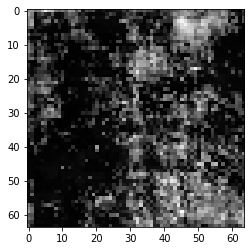

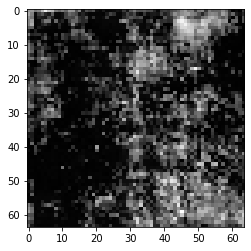

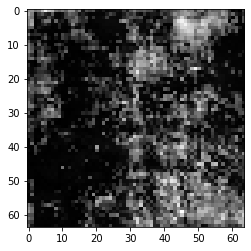

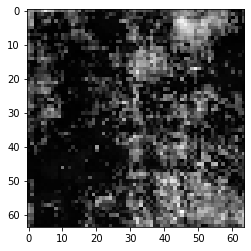

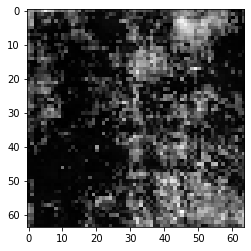

In [10]:
N = 5
for i in range(N):
  plt.imshow((random.choice(norm_samples) * 255).reshape(64,64),  cmap='gray')
  plt.show()

In [11]:
mu2, sigma2 = samples[0].mean(axis=0), np.cov(samples[0],  rowvar=False)
# samples.clear

In [12]:
from scipy import linalg

def calculate_fid(mu1, sigma1, mu2, sigma2):
    
    # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)

    # calculate sqrt of product between cov
    covmean = linalg.sqrtm(sigma1.dot(sigma2))

    # check and correct imaginary numbers from sqrt
    if np.iscomplexobj(covmean):
       covmean = covmean.real

    # calculate score
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

fid = calculate_fid(mu1, sigma1, mu2, sigma2)
print(f'fid score: {fid}')

fid score: 75.63349620624368
